In [1]:
import pandas as pd

customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

print("Customers Dataset:")
print(customers.head())

print("\nProducts Dataset:")
print(products.head())

print("\nTransactions Dataset:")
print(transactions.head())

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166   

In [2]:
print("Customers Shape:", customers.shape)
print("Products Shape:", products.shape)
print("Transactions Shape:", transactions.shape)

print("\nMissing Values in Customers:")
print(customers.isnull().sum())

print("\nMissing Values in Products:")
print(products.isnull().sum())

print("\nMissing Values in Transactions:")
print(transactions.isnull().sum())

Customers Shape: (200, 4)
Products Shape: (100, 4)
Transactions Shape: (1000, 7)

Missing Values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [3]:
total_customers = customers['CustomerID'].nunique()
total_products = products['ProductID'].nunique()
total_transactions = transactions['TransactionID'].nunique()
total_revenue = transactions['TotalValue'].sum()
print(f"\nTotal Customers: {total_customers}")
print(f"Total Products: {total_products}")
print(f"Total Transactions: {total_transactions}")
print(f"Total Revenue: ${total_revenue:.2f}")


Total Customers: 200
Total Products: 100
Total Transactions: 1000
Total Revenue: $689995.56


In [4]:
customer_region_distribution = customers['Region'].value_counts()
print("\nCustomer Region Distribution:")
print(customer_region_distribution)

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
signup_trends = customers['SignupDate'].dt.to_period('M').value_counts().sort_index()
print("\nSignup Trends:")
print(signup_trends)


Customer Region Distribution:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

Signup Trends:
SignupDate
2022-01     1
2022-02     7
2022-03     8
2022-04     8
2022-05     8
2022-06     5
2022-07     4
2022-08     4
2022-09     6
2022-10     3
2022-11     3
2022-12     7
2023-01     5
2023-02     6
2023-03     8
2023-04     6
2023-05     3
2023-06     3
2023-07     3
2023-08     2
2023-09     4
2023-10     7
2023-11     5
2023-12     5
2024-01     9
2024-02     8
2024-03     4
2024-04    10
2024-05     6
2024-06     4
2024-07     6
2024-08     4
2024-09    11
2024-10     5
2024-11    11
2024-12     1
Freq: M, Name: count, dtype: int64



Transaction Trends:
TransactionDate
2023-12      4
2024-01    107
2024-02     77
2024-03     80
2024-04     86
2024-05     86
2024-06     69
2024-07     96
2024-08     94
2024-09     96
2024-10     70
2024-11     57
2024-12     78
Freq: M, Name: count, dtype: int64

Total Sales per Region:
          Region  TotalValue
3  South America   219352.56
1         Europe   166254.63
2  North America   152313.40
0           Asia   152074.97


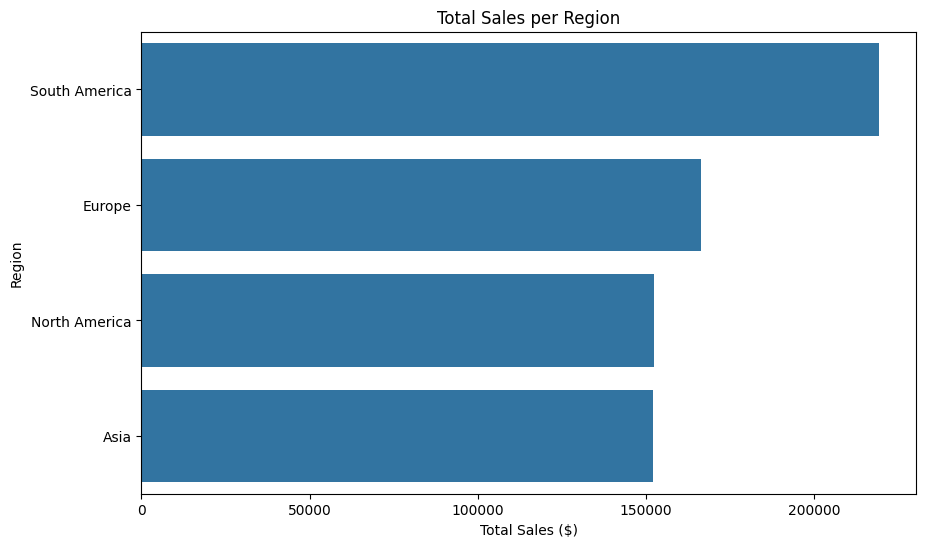

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transaction_trends = transactions['TransactionDate'].dt.to_period('M').value_counts().sort_index()
print("\nTransaction Trends:")
print(transaction_trends)

total_sales_per_region = transactions.merge(customers[['CustomerID', 'Region']], on='CustomerID')
total_sales_per_region = total_sales_per_region.groupby('Region')['TotalValue'].sum().reset_index()
total_sales_per_region = total_sales_per_region.sort_values(by='TotalValue', ascending=False)

print("\nTotal Sales per Region:")
print(total_sales_per_region)

plt.figure(figsize=(10, 6))
sns.barplot(x='TotalValue', y='Region', data=total_sales_per_region)
plt.title('Total Sales per Region')
plt.xlabel('Total Sales ($)')
plt.ylabel('Region')
plt.show()